Naïve Bayes Accuracy: 0.67

Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       1.00      0.50      0.67         4

    accuracy                           0.67         6
   macro avg       0.75      0.75      0.67         6
weighted avg       0.83      0.67      0.67         6


Confusion Matrix:
 [[2 0]
 [2 2]]


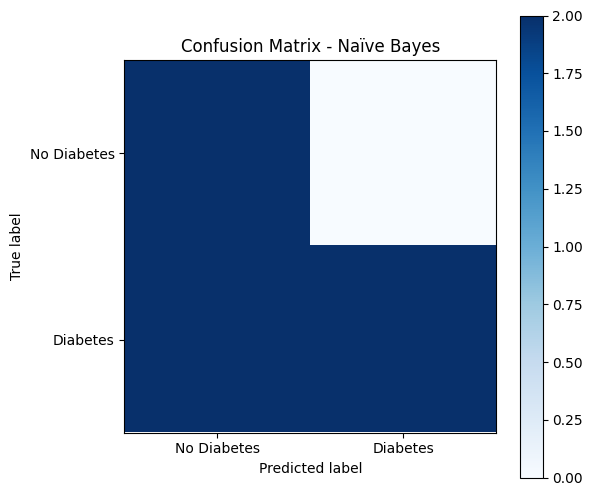

In [4]:
# Import necessary libraries
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

# Custom dataset for Diabetes risk prediction
data = {
    "Age": [25, 45, 35, 50, 40, 60, 55, 48, 39, 42, 28, 33, 47, 51, 30, 37, 44, 53, 49, 29],
    "Cholesterol": [180, 220, 240, 260, 200, 290, 300, 210, 230, 250, 220, 210, 240, 260, 230, 240, 210, 230, 250, 210],
    "BloodPressure": [120, 140, 135, 150, 125, 160, 155, 130, 140, 145, 125, 130, 140, 150, 145, 130, 135, 140, 150, 145],
    "BMI": [18.5, 24.3, 29.0, 26.0, 20.5, 32.1, 35.2, 28.5, 22.0, 27.8, 31.0, 33.5, 25.5, 21.5, 30.0, 28.2, 26.0, 30.5, 32.1, 29.0],
    "Smoking": [0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1],  # 0 = No, 1 = Yes
    "Exercise": [1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1],  # 1 = Regular, 0 = None
    "Diabetes": [0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0]  # 1 = Diabetes, 0 = No Diabetes
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Split dataset into features (X) and target variable (y)
X = df[["Age", "Cholesterol", "BloodPressure", "BMI", "Smoking", "Exercise"]]  # Features
y = df["Diabetes"]  # Target variable

# Split data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Naïve Bayes classifier
nb = GaussianNB()

# Train the classifier
nb.fit(X_train, y_train)

# Predict the response for the test dataset
y_pred = nb.predict(X_test)

# Model Accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Naïve Bayes Accuracy: {accuracy:.2f}")

# Classification Report
print("\nClassification Report:\n", metrics.classification_report(y_test, y_pred))

# Confusion Matrix
cm = metrics.confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

# Visualizing the Confusion Matrix
plt.figure(figsize=(6,6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Naïve Bayes")
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ["No Diabetes", "Diabetes"])
plt.yticks(tick_marks, ["No Diabetes", "Diabetes"])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()
